In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from varclushi import VarClusHi
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [6]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

base = pd.read_csv('additional_data/base.csv')

backfill = pd.read_csv('additional_data/imputed_sets/backfill.csv')
mean = pd.read_csv('additional_data/imputed_sets/mean.csv')
interpolation = pd.read_csv('additional_data/imputed_sets/interpolation.csv')
ice1 = pd.read_csv('additional_data/imputed_sets/ice.csv')
ice2 = pd.read_csv('additional_data/imputed_sets/ice2.csv')
ice3 = pd.read_csv('additional_data/imputed_sets/ice3.csv')
mice = pd.read_csv('additional_data/imputed_sets/mice.csv')
knn = pd.read_csv('additional_data/imputed_sets/knn.csv')

sets = {'Original':base, 'Backfill':backfill, 'Mean':mean, 'Interpolation':interpolation, 'ICE 1':ice1, 'ICE 2':ice2, 'ICE 3':ice3, 
        'MICE':mice, 'KNN':knn}

In [7]:
new = pd.read_csv('additional_data/chosen_indicators.csv', sep=';')
new.dropna(subset=['percentage'], inplace=True)
new.drop('percentage', axis=1, inplace=True)

In [16]:
table = []
for name, df in sets.items():
    df = df.set_index(['Country Name', 'Indicator Name'])
    df = df.loc[df.index.isin(new['indicators'], level='Indicator Name')]
    n = (df>100).sum().sum()
    table.append([name, n])

In [18]:
table = pd.DataFrame(table, columns=['Datensatz', 'logische Fehler'])
table = table.set_index('Datensatz')
print(table.to_latex(label='tab:logic', caption='Prozentwerte \>100 für Indikatoren die diese nicht zulassen.'))

\begin{table}
\centering
\caption{Prozentwerte \>100 für Indikatoren die diese nicht zulassen.}
\label{tab:logic}
\begin{tabular}{lr}
\toprule
{} &  logische Fehler \\
Datensatz     &                  \\
\midrule
Original      &                0 \\
Backfill      &            15392 \\
Mean          &                0 \\
Interpolation &            24836 \\
ICE 1         &            55798 \\
ICE 2         &            50467 \\
ICE 3         &             3062 \\
MICE          &            52316 \\
KNN           &                0 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\mbfbr\AppData\Local\Temp\ipykernel_9580\2651310779.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex(label='tab:logic', caption='Prozentwerte \>100 für Indikatoren die diese nicht zulassen.'))


In [6]:
mice = mice.reset_index()


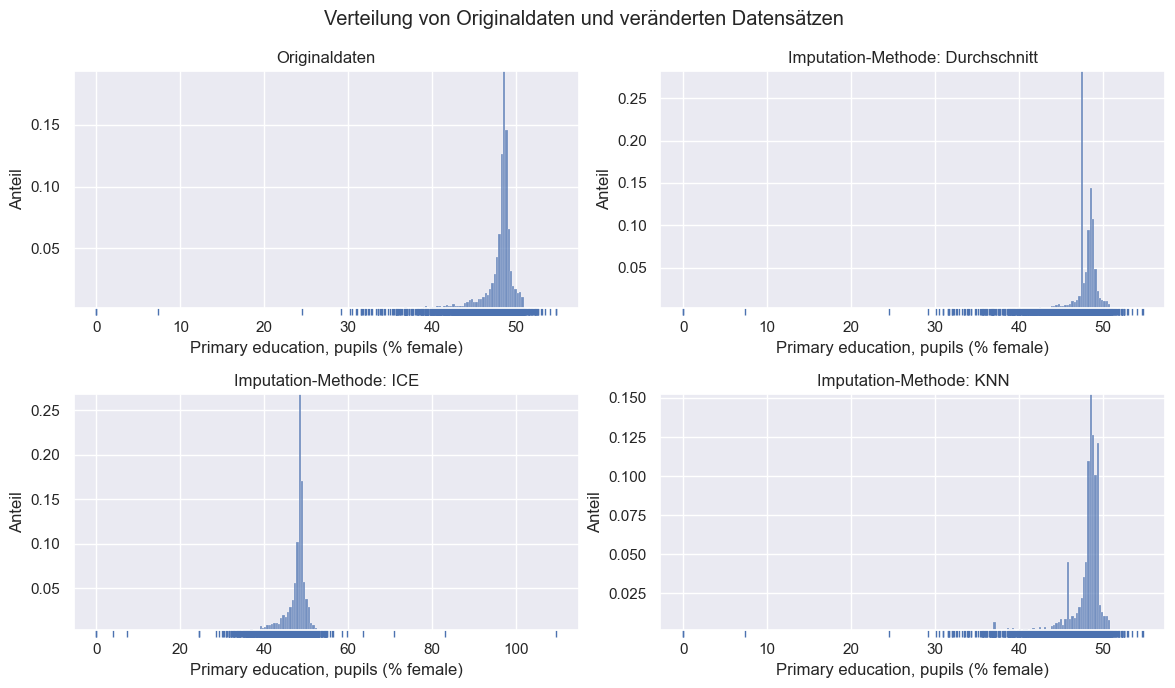

In [7]:
x='Primary education, pupils (% female)'
sns.set_theme()
#sns.set_palette("tab10")

df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_mean = mean.loc[mean['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_ice3 = ice3.loc[ice3['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_knn = knn.loc[knn['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 7), nrows=2, ncols=2)


sns.histplot(data=df_base.stack(), bins=200, stat='proportion', legend=False, ax=ax1)
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=ax1)
ax1.set_title('Originaldaten')
ax1.set_ylabel('Anteil')
ax1.set_xlabel(x)

sns.histplot(data=df_mean.stack(), bins=200, stat='proportion', legend=False, ax=ax2)
sns.rugplot(data=df_mean.stack(), height=-.03, clip_on=False, ax=ax2)
ax2.set_title('Imputation-Methode: Durchschnitt')
ax2.set_ylabel('Anteil')
ax2.set_xlabel(x)

sns.histplot(data=df_ice3.stack(), bins=200, stat='proportion', legend=False, ax=ax3)
sns.rugplot(data=df_ice3.stack(), height=-.03, clip_on=False, ax=ax3)
ax3.set_title('Imputation-Methode: ICE')
ax3.set_ylabel('Anteil')
ax3.set_xlabel(x)

sns.histplot(data=df_knn.stack(), bins=200, stat='proportion', legend=False, ax=ax4)
sns.rugplot(data=df_knn.stack(), height=-.03, clip_on=False, ax=ax4)
ax4.set_title('Imputation-Methode: KNN')
ax4.set_ylabel('Anteil')
ax4.set_xlabel(x)

plt.suptitle('Verteilung von Originaldaten und veränderten Datensätzen')
plt.tight_layout()
plt.savefig('figures/results/density_education')

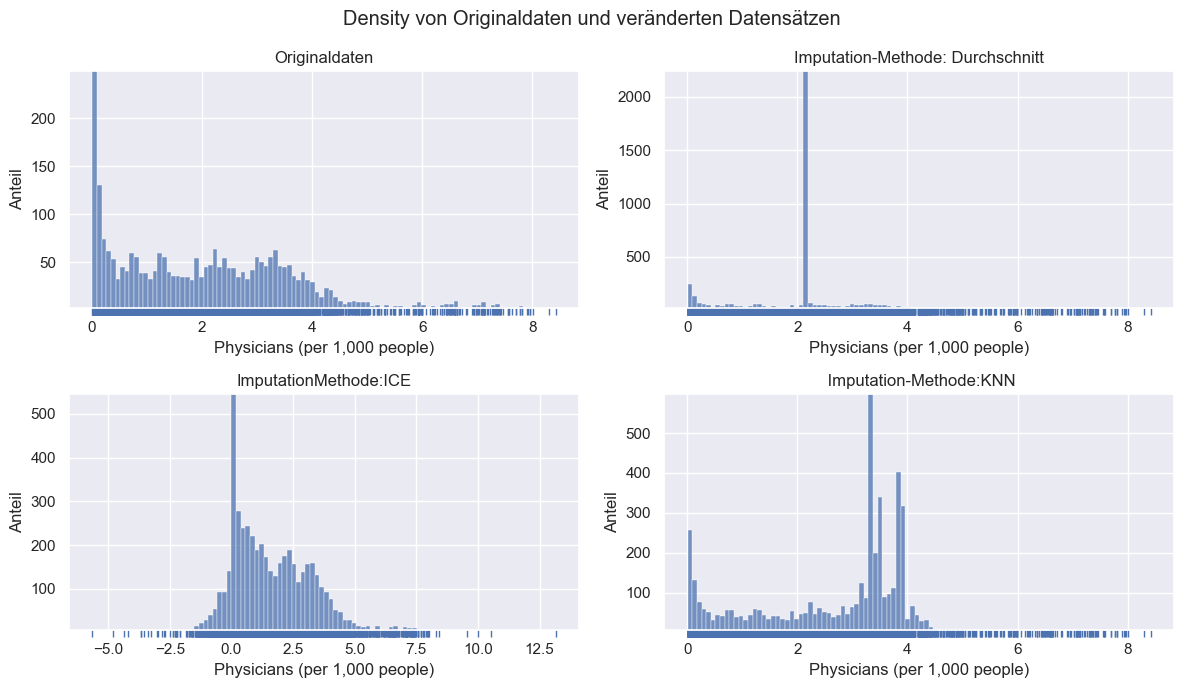

In [20]:
x='Physicians (per 1,000 people)'
sns.set_theme()
#sns.set_palette("tab10")


df_base = base.loc[base['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_mean = mean.loc[mean['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_ice3 = ice3.loc[ice3['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])
df_knn = knn.loc[knn['Indicator Name']==x].set_index(['Country Name', 'Indicator Name'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(12, 7), nrows=2, ncols=2)


sns.histplot(data=df_base.stack(), bins=100, stat='count', legend=False, ax=ax1)
sns.rugplot(data=df_base.stack(), height=-.03, clip_on=False,  ax=ax1)
#sns.kdeplot(data=df_base.stack(), ax=ax1)
ax1.set_title('Originaldaten')
ax1.set_ylabel('Anteil')
ax1.set_xlabel(x)

sns.histplot(data=df_mean.stack(), bins=100, stat='count', legend=False, ax=ax2)
sns.rugplot(data=df_mean.stack(), height=-.03, clip_on=False, ax=ax2)
#sns.kdeplot(data=df_base.stack(), ax=ax2)
ax2.set_title('Imputation-Methode: Durchschnitt')
ax2.set_ylabel('Anteil')
ax2.set_xlabel(x)

sns.histplot(data=df_ice3.stack(), bins=100, stat='count', legend=False, ax=ax3)
sns.rugplot(data=df_ice3.stack(), height=-.03, clip_on=False, ax=ax3)
#sns.kdeplot(data=df_base.stack(), ax=ax3)
ax3.set_title('ImputationMethode:ICE')
ax3.set_ylabel('Anteil')
ax3.set_xlabel(x)

sns.histplot(data=df_knn.stack(), bins=100, stat='count', legend=False, ax=ax4)
sns.rugplot(data=df_knn.stack(), height=-.03, clip_on=False, ax=ax4)
#sns.kdeplot(data=df_base.stack(), ax=ax4)
ax4.set_title(' Imputation-Methode:KNN')
ax4.set_ylabel('Anteil')
ax4.set_xlabel(x)

plt.suptitle('Density von Originaldaten und veränderten Datensätzen')
plt.tight_layout()
plt.savefig('figures/results/density_phyicians')

In [39]:
df_mean.stack().mode()

0   2.1354
dtype: float64

In [9]:
set_names = ['r1','r1_detail','r2','r2_detail', 'r3','r3_detail']
sets = []
for name in set_names:
    sets.append(pd.read_csv(f'additional_data/results/{name}.csv'))
sets = {set_names[i]: sets[i] for i in range(len(sets))}

In [10]:
sets['r1_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r2_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']
sets['r3_detail'].columns = ['method', 'run','r2','rmse','still_missing','t']

sets['r1_detail'].run = sets['r1_detail'].run + 1
sets['r2_detail'].run = sets['r2_detail'].run + 1
sets['r3_detail'].run = sets['r3_detail'].run + 1

sets['r1_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r2_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)
sets['r3_detail'].replace('Yearly Mean per Region', 'Yearly Mean/Region', inplace=True)

sets['r1_detail'].set_index(['method', 'run'], inplace=True)
sets['r2_detail'].set_index(['method', 'run'], inplace=True)
sets['r3_detail'].set_index(['method', 'run'], inplace=True)

sets['r1'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r2'].columns = ['method', 'r2','RMSE','still_missing','t']
sets['r3'].columns = ['method', 'r2','RMSE','still_missing','t']

sets['r1_detail'].still_missing = sets['r1_detail'].still_missing.astype(int)
sets['r2_detail'].still_missing = sets['r2_detail'].still_missing.astype(int)
sets['r3_detail'].still_missing = sets['r3_detail'].still_missing.astype(int)


sets['r1'].set_index('method', inplace=True)
sets['r2'].set_index('method', inplace=True)
sets['r3'].set_index('method', inplace=True)

In [11]:
sets['r1_detail'].rmse

method    run
Backfill  1     3.1265
          2     1.1896
          3     1.0227
          4     2.0859
          5     3.5339
                 ...  
KNN 2     3     0.6086
          4     1.5581
          5     2.6687
          6     0.6719
          7     0.3434
Name: rmse, Length: 84, dtype: float64

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(sets['r1'].to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &    r2 &  RMSE &  still\_missing &      t \\
method                 &       &       &                &        \\
\midrule
Backfill               & -2.09 &  1.99 &       32841.00 &   0.88 \\
Overall Mean           & -0.38 &  1.52 &           0.00 &   1.15 \\
Yearly Mean            &  0.00 &  1.44 &       52298.00 &   0.98 \\
Yearly Mean per Region & -0.04 &  1.46 &       58352.71 &   1.10 \\
Interpolate 3          & -0.82 &  1.71 &       32871.43 &   0.95 \\
Interpolate all        & -0.82 &  1.69 &          58.00 &   0.93 \\
ICE 1                  &  0.96 &  0.17 &           0.00 &   9.97 \\
ICE 2                  &  0.94 &  0.35 &           0.00 &  24.33 \\
ICE 3                  &  0.74 &  0.73 &           0.00 &  85.89 \\
MICE                   &  0.96 &  0.19 &           0.00 & 139.68 \\
KNN 1                  &  0.30 &  1.18 &           0.00 & 106.59 \\
KNN 2                  &  0.32 &  1.18 &           0.00 &  18.84 \\
\bottomrule
\end{tabular}


C:\Users\mbfbr\AppData\Local\Temp\ipykernel_2656\1756817728.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sets['r1'].to_latex())


In [13]:
sets['r3']

,r2,RMSE,still_missing,t
method,,,,
Backfill,-2.40,1.52,33689.29,1.61
Overall Mean,-0.40,1.01,0.00,1.86
Yearly Mean,0.01,0.88,52320.57,1.69
Yearly Mean per Region,-0.05,0.90,58597.43,1.80
Interpolate 3,-0.89,1.18,33720.00,1.68
Interpolate all,-0.89,1.16,58.43,1.65
ICE 1,0.96,0.17,0.00,10.60
ICE 2,0.96,0.17,0.00,24.85
ICE 3,0.76,0.43,0.00,86.70


In [14]:
#print(sets['r3_detail'].to_latex(longtable=True,caption= 'Detailierte Ergebnisse aller Durchläufe auf Datensätzen mit 10\% fehlenden Werten.'))

In [15]:
rs = pd.DataFrame({'5,0%': sets['r1_detail'].r2, '7,5%':sets['r2_detail'].r2, '10,0%': sets['r3_detail'].r2},
                 index = sets['r1_detail'].r2.index)
rs = rs.reset_index()

d = pd.DataFrame(rs.drop('run', axis=1).set_index('method').stack())
d = d.reset_index()
d.columns = ['Methode', 'entfernte Werte', 'r2']

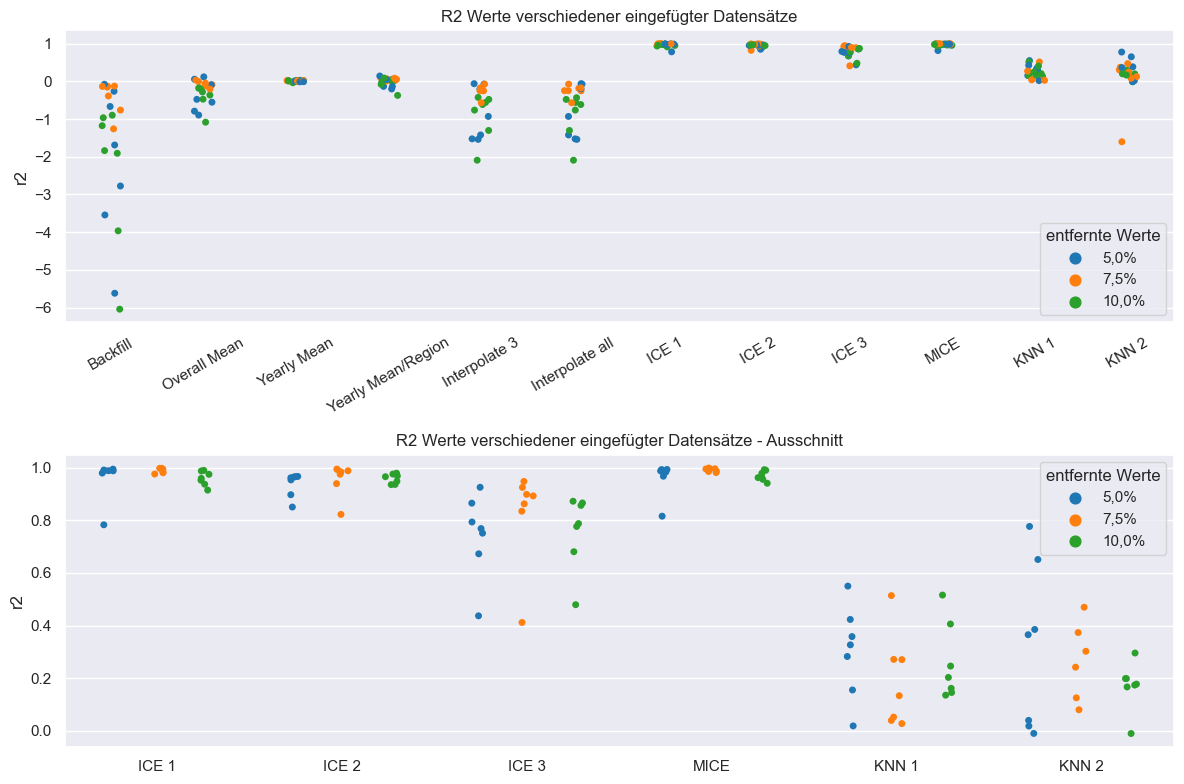

In [16]:
sns.set_style("darkgrid")
#sns.set_palette("Set1")
sns.set_palette("tab10")

fig, (ax1, ax2) = plt.subplots(figsize =(12, 8), nrows=2)
sns.stripplot(data=d, x='Methode', y='r2', hue='entfernte Werte',  ax=ax1)
sns.stripplot(data=d.loc[d['Methode'].isin(['ICE 1', 'ICE 2','ICE 3','MICE','KNN 1', 'KNN 2'])].drop(232),
              x='Methode', y='r2', hue='entfernte Werte', dodge=True, ax=ax2)

ax1.set_title('R2 Werte verschiedener eingefügter Datensätze')
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel('')
ax2.set_title('R2 Werte verschiedener eingefügter Datensätze - Ausschnitt')
ax2.set_xlabel('')
plt.tight_layout()

plt.savefig('figures/results/r2')